# NYU CUSP: Applied Data Science, Network Analysis module, session 2
# Node centrality

Consider a network (non-weighted) $(N,E)$ where
$$
N=\{a_i, i=1..n\},\ E=\{(a_j, b_j)\}
$$
Start from an undirected case. Denote adjacency matrix of this network as $A$.

### Degree centrality
A simplest definition of node centrality is the node degree
$$
{\rm degree\_centrality}(a)=|\{(a, b)\in E\}|,
$$

reflecting a basic idea that the more connections the node has the more important it is. Generally this idea is viable for many case, although it does not always capture all the important patterns in each specific context.

### Eigenvector centrality
For example it might be important to give more credit to the connections with other strong nodes, compared to the connection with weaker ones. The most streighforward implementation of this idea is to consider node centrality to be proportional to the cumulative centrality of its direct connections.
$$
{\rm centrality}(a)\sim\sum\limits_{(a, b)\in E}{\rm centrality}(b), 
$$
leading to a definition of an eigenvector centrality $c$ from
$$
\lambda c=A c.
$$
This way centrality distribution could be any eigenvector $e_i$ of the matrix $A$, while for our definition we'll take the leading eigenvector $e_1$ having the highest eigenvalue $\lambda_1$, based on the idea that starting from an arbitrary centrality definition $x=\sum x_i e_i$ and iteratively replacing it by $A x$ (i.e. cumulative centralities of each node's connections) and then normalizing (like square sum of all centrality measured should be 1) on each $j$-th step  we'll be getting
$$
x=\sum_i (\lambda_i)^j x_i e_i.
$$
We can be also applying normalizations in order to ensure that the cumulative centrality is $1$.
As we can see, after each new interation component $e_1$ becomes incresingly dominating, unless $x_i=0$. So the first leading eigenvector is not only a stationary state under the above $x\to Ax$ transform, but also a limiting case of such iterations. So
$$
{\rm eigenvector\_centrality}(a)=e_1.
$$

## Katz centrality
Although the above eigenvector centrality is formally generalizeable to the directed case as well:
$$
{\rm centrality}(a)\sim\sum\limits_{(b, a)\in E}{\rm centrality}(b), 
$$
$$
\lambda_1 c=A^T c,
$$
this streighforward generalization faced certain issues. Those originate from the cases of nodes having zero in-degree and non-zero outdegree, which will be given zero centrality score from above. Although it might not be thought as an issue per se, this issue might propogate further giving zero score also to many other highly nodes connected, which have all their incoming connections originate from the zero-centrality nodes. Situation can be fixed by giving each node a certain starting centrality score "for free", i.e. let
$$
{\rm centrality}(a)=\alpha\sum\limits_{(b, a)\in E}{\rm centrality}(b)+\beta. 
$$
The choice of parameters $\alpha$ and $\beta$ is arbitrary with the only limitation that $\alpha<1/\lambda_1$, there
$\lambda_1$ is the leading eigenvalue of $A^T$. 

Computing Katz centrality for each specific choice of $\alpha,\beta$ requires solving this linear system above, which in practice could be done through an iterative approximation process.

## Pagerank centrality
Another important modification to the above scoring introduced by Google for the purpose of ranking web-pages, is relating to accounting for an idea that the strength of each connection is not the same, but rather depends on the number of other connections the corresponding nodes have, i.e. strength of connection from node $b$ to the considered node $a$ is inversely proportional to the total number of connections of node $b$. This idea comes for example from the concept of a random walker jumping from one node of the network to another randomly following network edges - then, assuming that the network is connected, the centrality of a node will be simply a probability of having a random walker in each node after a certain big enough number of iterations.
This way (in case of undirected networks):
$$
{\rm centrality}(a)\sim\sum\limits_{(a, b)\in E}\frac{{\rm centrality}(b)}{degree(b)}. 
$$
However this definition will simply lead us back to the original notion of the degree centrality, as the least obviously satisfies the above equation. Situation starts being less obvious if we introduce a damping parameter $0<\alpha<1$, letting a random walker follow the above strategy with a probability $\alpha$, while otherwise (with a probability $1-\alpha$ called the teleportation parameter) just randomly jump (teleport) to an arbitrary node of the network. The idea was motivated by a web surfing behavior, when the user follows the links of the visited webpages for some time and then jumps to a completely new page, restarting the process from scratch. This way
$$
{\rm pagerank}(a)=\alpha\sum\limits_{(a, b)\in E}\frac{{\rm pagerank}(b)}{degree(b)}+\frac{1-\alpha}{n}. 
$$
Similarly to eigenvector and Katz centrality defining pagegank requires solving this linear system, which in practice could be done through an iterative approximation process.

The choice of $\alpha$ is custom, although it was noticed that in many cases $\alpha=0.85$ works well, and also the ranking is not too sensitive to the particular choice of $\alpha$ around this value.

The notion of pagerank could be easily generalized for the case of directed networks:
$$
{\rm pagerank}(a)=\alpha\sum\limits_{(b, a)\in E}\frac{{\rm pagerank}(b)}{out\_degree(b)}+\frac{1-\alpha}{n}. 
$$
The directed case also gives non-trivial results even for $\alpha=1$. However for $\alpha=1$ this definition has issues with the particular case of having nodes with zero out-degree (deadends) as they will start accumulating rank, leaving zero rank to many if not all of the remaining nodes with nonzero outdegree (basically to all the nodes from which the deadends are accessible).

## Betweenness centrality

Sometimes, especially when considering resilience/vulnerability of different social or infrastructural networks, including road infrastructure, it us also relevant to understand how important the node is for the internal network topology - specifically for the shortest-path routing. In order to address this idea betweenness centrality is introduced for connected directed or undirected networks in the following way: 
$$
{\rm betweenness\_centrality}(a)=\sum_{b,c\in N,b\neq a\neq c}\frac{|g_{b,c}: a\in g_{b,c}|}{|g_{b,c}|},
$$
where $g_{b,c}$ denotes the set of all shortest or geodesic paths between $b$ and $c$. Although we typically do not care about the absolute, but rather relative values of centrality, in case we want to have the above value normalized between 0 and 1 we can introduce a normalization factor of $\frac{1}{(n-1)(n-2)}$ according to the maximal possible number of paths going through $a$. The maximal possible normalized value of $1$ is reached for the central point in a star-like network topology.

## Closeness centrality

Another concept of centrality related to the network routing is closeness centrality, which represents how close the node is to all other nodes, i.e. how short the corresponding geodesic paths are:
$$
{\rm closeness\_centrality}(a)=\frac{1}{\sum_{b\in N} d_{a,b}},
$$
or in the normalized form:
$$
{\rm closeness\_centrality}(a)=\frac{n-1}{\sum_{b\in N, b\neq a}d_{a,b}},
$$
where $d_{a,b}$ denotes the distance (length of the geogesic path) from $a$ to $b$. The second version is always normalized between $0$ and $1$ and the maximal value of $1$ is acheived if node $a$ is directly connected to all other nodes in the network. 

Notice that this definition also works pretty well for both - directed and undirected networks, however in case of undirected networks it might be also relevant to consider the incoming version of closeness
$$
{\rm closeness\_centrality}(a)=\frac{n-1}{\sum_{b\in N, b\neq a}d_{b,a}}
$$
showing how close $a$ is to other nodes rather than how close other nodes are to $a$.

In [1]:
#add necessary libraries
import networkx as nx #library supporting networks
import matplotlib.pyplot as plt #plotting
import pandas as pd
import numpy as np
import scipy.stats as stat
#make sure plots are embedded into the notebook
%pylab inline 
import statsmodels.formula.api as smf

Populating the interactive namespace from numpy and matplotlib


## World airflight connections

Using the same dataset as last time explore different node centrality measures

In [2]:
cities = pd.read_csv( 'https://serv.cusp.nyu.edu/files/ADS-2015/NetworkAnalysis/lab1/citiesTable.csv' , index_col=0 )
cities.head()

country name most active airport  long. most active airport  \
city name                                                                  
London     United Kingdom            Heathrow                     -0.103   
Chicago     United States  Chicago Ohare Intl                    -87.842   
Paris              France   Charles De Gaulle                      2.916   
Moscow             Russia          Domododevo                     38.510   
Shanghai            China              Pudong                    122.342   

           lat. most active airport  number of routes  \
city name                                               
London                       51.795              1984   
Chicago                      42.631              1406   
Paris                        49.021              1254   
Moscow                       55.681              1179   
Shanghai                     31.238              1115   

           number incoming flights  number outcoming flights  \
city name                                                      
London                         993                       992   
Chicago                        705                       702   
Paris                          626                       629   
Moscow                         589                       591   
Shanghai                       560                       556   

           number incoming domestic flights  \
city name                                     
London                                   57   
Chicago                                 526   
Paris                                    68   
Moscow                                  231   
Shanghai                                357   

           number outcoming domestic flights  \
city name                                      
London                                    57   
Chicago                                  523   
Paris                                     68   
Moscow                                   231   
Shanghai                                 353   

           number incoming international flights  \
city name                                          
London                                       936   
Chicago                                      179   
Paris                                        558   
Moscow                                       358   
Shanghai                                     203   

           number outcoming international flights  only domestic flights  \
city name                                                                  
London                                        934                      0   
Chicago                                       178                      0   
Paris                                         560                      0   
Moscow                                        359                      0   
Shanghai                                      202                      0   

           average distance  max. distance  
city name                                   
London                 3228          11153  
Chicago                2328          12416  
Paris                  3367          11652  
Moscow                 2772          10054  
Shanghai               2235          12245

In [3]:
#create a network with city names as nodes
Flights=nx.Graph()
Flights.add_nodes_from(cities.index)

In [4]:
#create a dictionary of city locations
CityPos={}
for c in cities.index:
    CityPos[c]=(cities['long. most active airport'][c],cities['lat. most active airport'][c])

In [6]:
#now read the links
links = pd.read_csv( 'https://serv.cusp.nyu.edu/files/ADS-2015/NetworkAnalysis/lab1/citiesToCities.csv' , index_col=None )
links.head()

departure city  long. departure (decimal)  lat. departure (decimal)  \
0       Sao Paulo                    -46.116                   -23.054   
1  Rio De Janeiro                    -42.740                   -22.682   
2         Beijing                    116.974                    40.133   
3    Johannesburg                     28.410                   -25.566   
4        Honolulu                   -157.871                    21.531   

  departure country    arrival city  long. departure (decimal).1  \
0            Brazil  Rio De Janeiro                      -42.740   
1            Brazil       Sao Paulo                      -46.116   
2             China        Shanghai                      122.342   
3      South Africa       Cape Town                       19.002   
4     United States           Tokyo                      140.643   

   lat. departure (decimal).1 arrival country  number of routes  distance  
0                     -22.682          Brazil                18       348  
1                     -23.054          Brazil                18       348  
2                      31.238           China                18      1100  
3                     -33.942    South Africa                16      1299  
4                      36.274           Japan                16      6103

In [8]:
#create list of edges as tuples
EN=len(links.index)
edgelist=[0]*EN
for j in range(0,EN):
    edgelist[j]=(links['departure city'][j],links['arrival city'][j])

In [9]:
#add edges to the network
Flights.add_edges_from(edgelist)

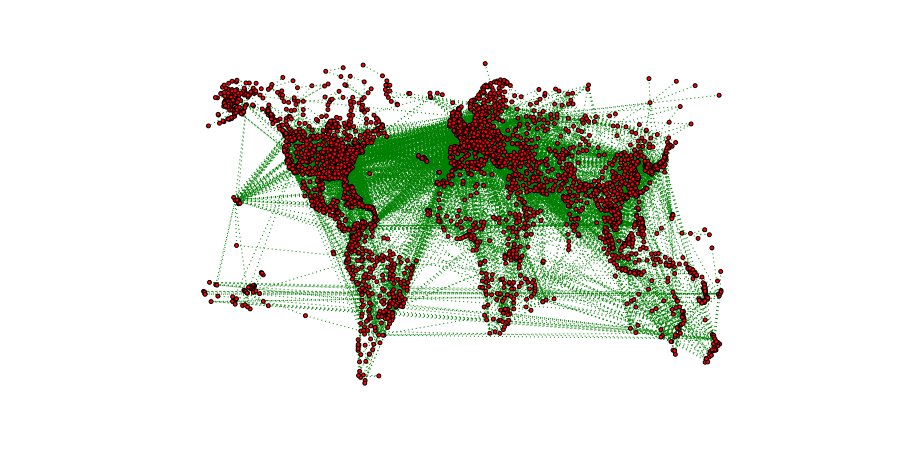

In [10]:
#visualize the network
plt.figure(figsize = (12,6))
nx.draw(Flights,pos=CityPos,with_labels=False,node_size=15,style='dotted',edge_color='green')

In [11]:
#output top tn centrality scores, given the dictionary d
def topdict(d,tn):
    ind=sorted(d, key=d.get, reverse=True)
    for i in range(0,tn):
       print('{0}|{1}:{2}'.format(i+1,ind[i],d[ind[i]]))

Now compute five centrality metrics - degree, eigenvector, betweenness, closeness and pagerank - and output top 10 world cities in terms according to those metrics

In [57]:
c1= nx.degree(Flights)
topdict(c1,10)

1|London:311
2|Paris:267
3|Frankfurt:232
4|Moscow:229
5|Atlanta:208
6|Amsterdam:208
7|Chicago:199
8|Beijing:184
9|Dallas-fort Worth:181
10|Istanbul:181


In [13]:
c2= nx.eigenvector_centrality(Flights)
topdict(c2,10)

1|London:0.194309472839
2|Frankfurt:0.177250397611
3|Paris:0.172347702447
4|Amsterdam:0.161511319799
5|Rome:0.138410551325
6|Munich:0.137075060575
7|New York:0.135286272552
8|Istanbul:0.125133381527
9|Madrid:0.125081455402
10|Zurich:0.124619311624


In [14]:
nx.number_connected_components(Flights)

4

In [15]:
FLC=sorted(nx.connected_components(Flights), key=len, reverse=True)

In [16]:
FLC[3]

['Block Island', 'Leixlip']

In [17]:
FLC[2]

['Grand Canyon West', 'Boulder City']

In [18]:
FLC[1]

['Akutan', 'Nikolski', 'Unalaska']

In [25]:
FCG=list(nx.connected_component_subgraphs(Flights, copy=True))[0]

In [26]:
c3 = nx.current_flow_betweenness_centrality(FCG)

In [28]:
topdict(c3,10)

1|Anchorage:0.0952802209355
2|Seattle:0.0734927052154
3|London:0.0718874727028
4|Paris:0.0708787338746
5|Moscow:0.0656803205197
6|Frankfurt:0.0560360145548
7|Toronto:0.0529087186813
8|Tokyo:0.0522153721577
9|Chicago:0.0507003742811
10|Amsterdam:0.0504917650603


In [29]:
c1['Anchorage']

33

In [30]:
c1['Seattle']

91

In [31]:
c4 = nx.closeness_centrality(FCG)

In [32]:
topdict(c4,10)

1|London:0.423355590283
2|Frankfurt:0.417483889045
3|Paris:0.416375576359
4|Amsterdam:0.409453146469
5|New York:0.400537634409
6|Toronto:0.396329299109
7|Los Angeles:0.396013289037
8|Chicago:0.392725355825
9|Dubai:0.392621870883
10|Newark:0.389644351464


In [43]:
c5 = nx.pagerank(Flights,0.85)
topdict(c5,10)

1|London:0.00664369021277
2|Moscow:0.00639477386108
3|Paris:0.00628119041679
4|Atlanta:0.00500516515221
5|Frankfurt:0.00479152789448
6|Chicago:0.00469879122779
7|Dallas-fort Worth:0.00468222106557
8|Denver:0.00461558375521
9|Houston:0.00438807611047
10|Amsterdam:0.00430202975265


Now visualize the network with the node size proportional to the pagerank centrality; first visualize just the network topology, next - visualize network in space with respect to real geographical context

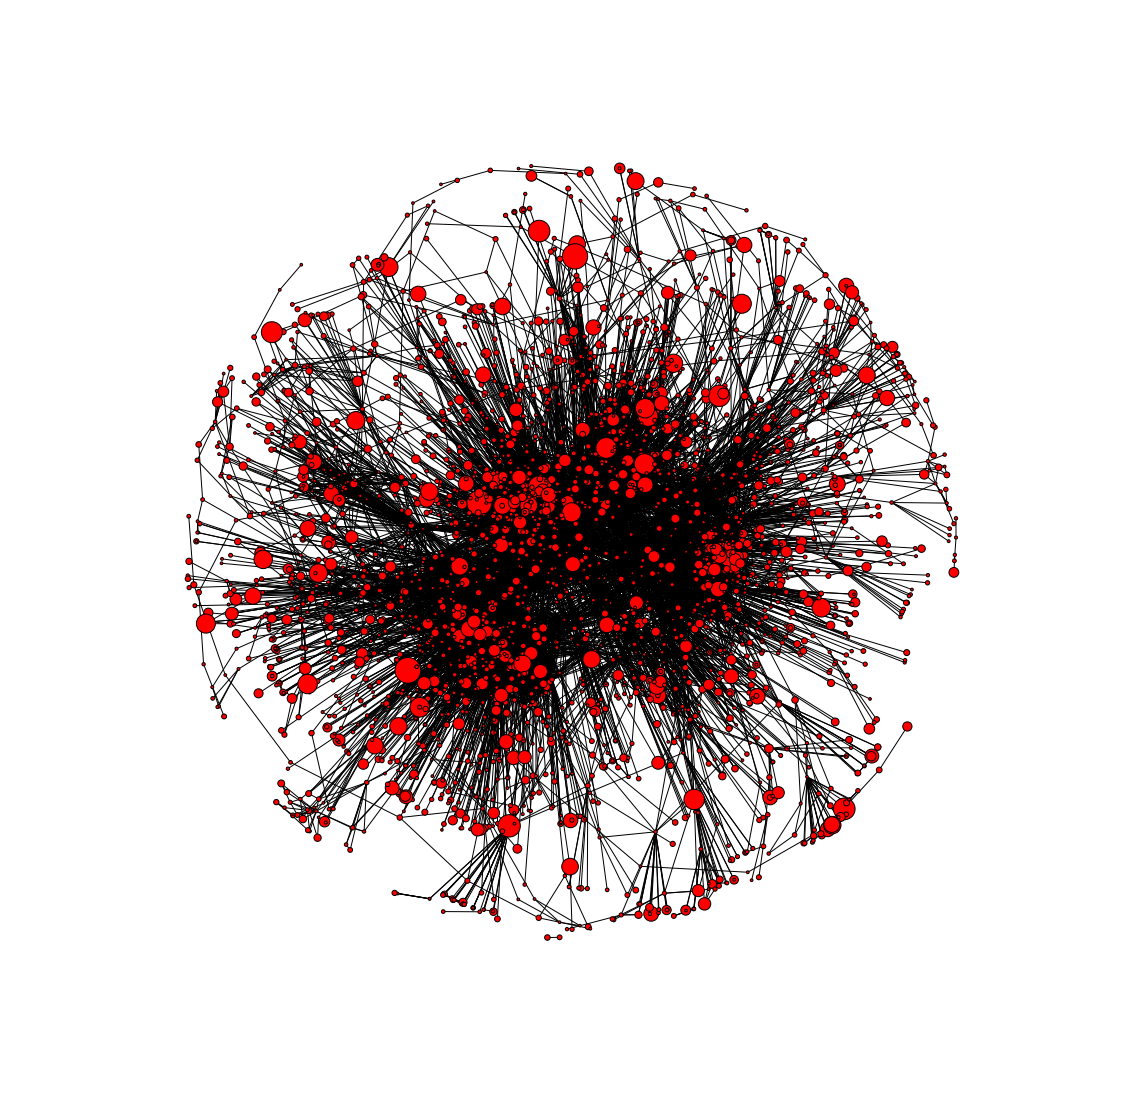

In [45]:
plt.figure(figsize = (15,15))
nx.draw(Flights,node_size=1E5*np.array(c5.values()),with_labels=False)

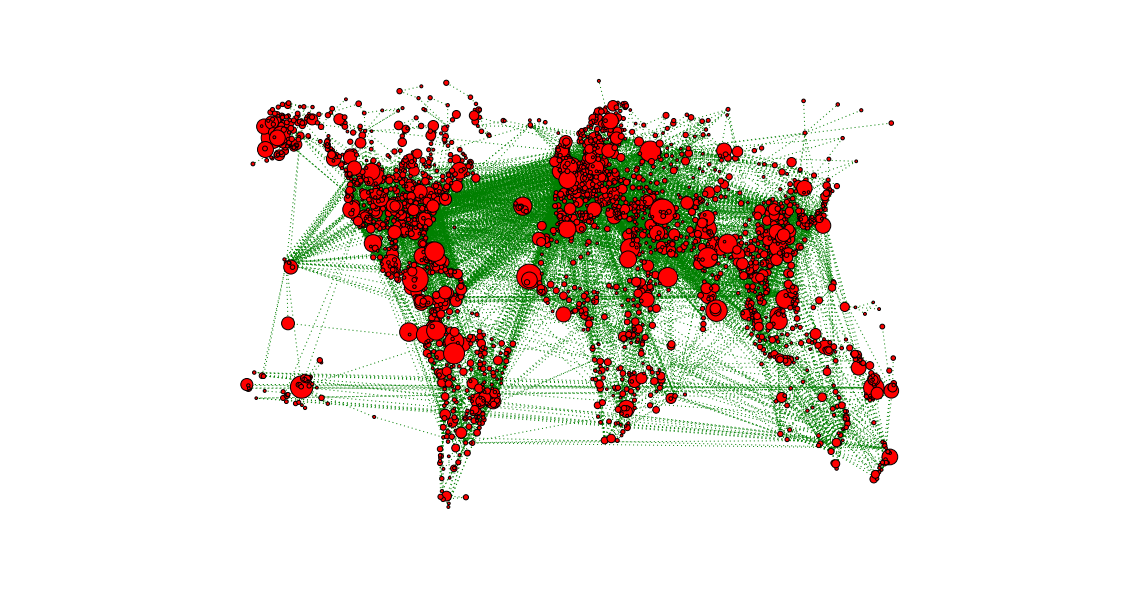

In [47]:
plt.figure(figsize = (15,8))
nx.draw(Flights,pos=CityPos,node_size=1E5*np.array(c5.values()),with_labels=False,style='dotted',edge_color='green')

# Manhattan Street Map

Consider a NYC Open Street Map network, downloaded from www.openstreetmap.org (using a rectangle containing Manhattan). We parsed and pre-processed it. For each node (street intersection) it's latitude-longitude is included as well as the flag shoing if the node actually belongs to Manhattan (verified using Manhattan shapefile)

In [48]:
NYCintersections = pd.read_csv( 'https://serv.cusp.nyu.edu/files/ADS-2015/NetworkAnalysis/lab2/ManhattanStreetMap_nodes.csv' , index_col=0, header=-1 )
NYCintersections.columns=['Y','X','m']
NYCintersections.head()

Y          X  m
0                                
30807307  40.792136 -73.962155  0
30807308  40.791991 -73.962188  0
30807309  40.791755 -73.962361  0
30807310  40.791482 -73.962549  0
30807311  40.791263 -73.962740  0

In [50]:
#number of street intersections on Manhattan
sum(NYCintersections.m)

446415

In [51]:
#create a dictionary of intersection locations and Manhattan flags
IntPos={}
InManhattan={}
for c in NYCintersections.index:
    IntPos[c]=(NYCintersections.X[c],NYCintersections.Y[c])
    InManhattan[c]=NYCintersections.m[c]

In [52]:
#read the network edges - street connections between adjacent nodes
#(extracted from the openstreetmap ways with respect to one-way flag)
NYCstreets = pd.read_csv( 'https://serv.cusp.nyu.edu/files/ADS-2015/NetworkAnalysis/lab2/StreetMap_edges.csv' , index_col=None, header=-1 )
NYCstreets.columns=['A','B']
NYCstreets.head()

A         B
0  33583379  33583380
1  33583380  33583379
2  33583380  33583381
3  33583381  33583380
4  33583381  33583382

In [53]:
#creare a directed graph representing street network
NYCStreets=nx.DiGraph()
for i in NYCstreets.index:
    #adding only streets inside Manhattan
    if InManhattan[NYCstreets.A[i]]&InManhattan[NYCstreets.B[i]]:
       NYCStreets.add_edge(NYCstreets.A[i],NYCstreets.B[i])   

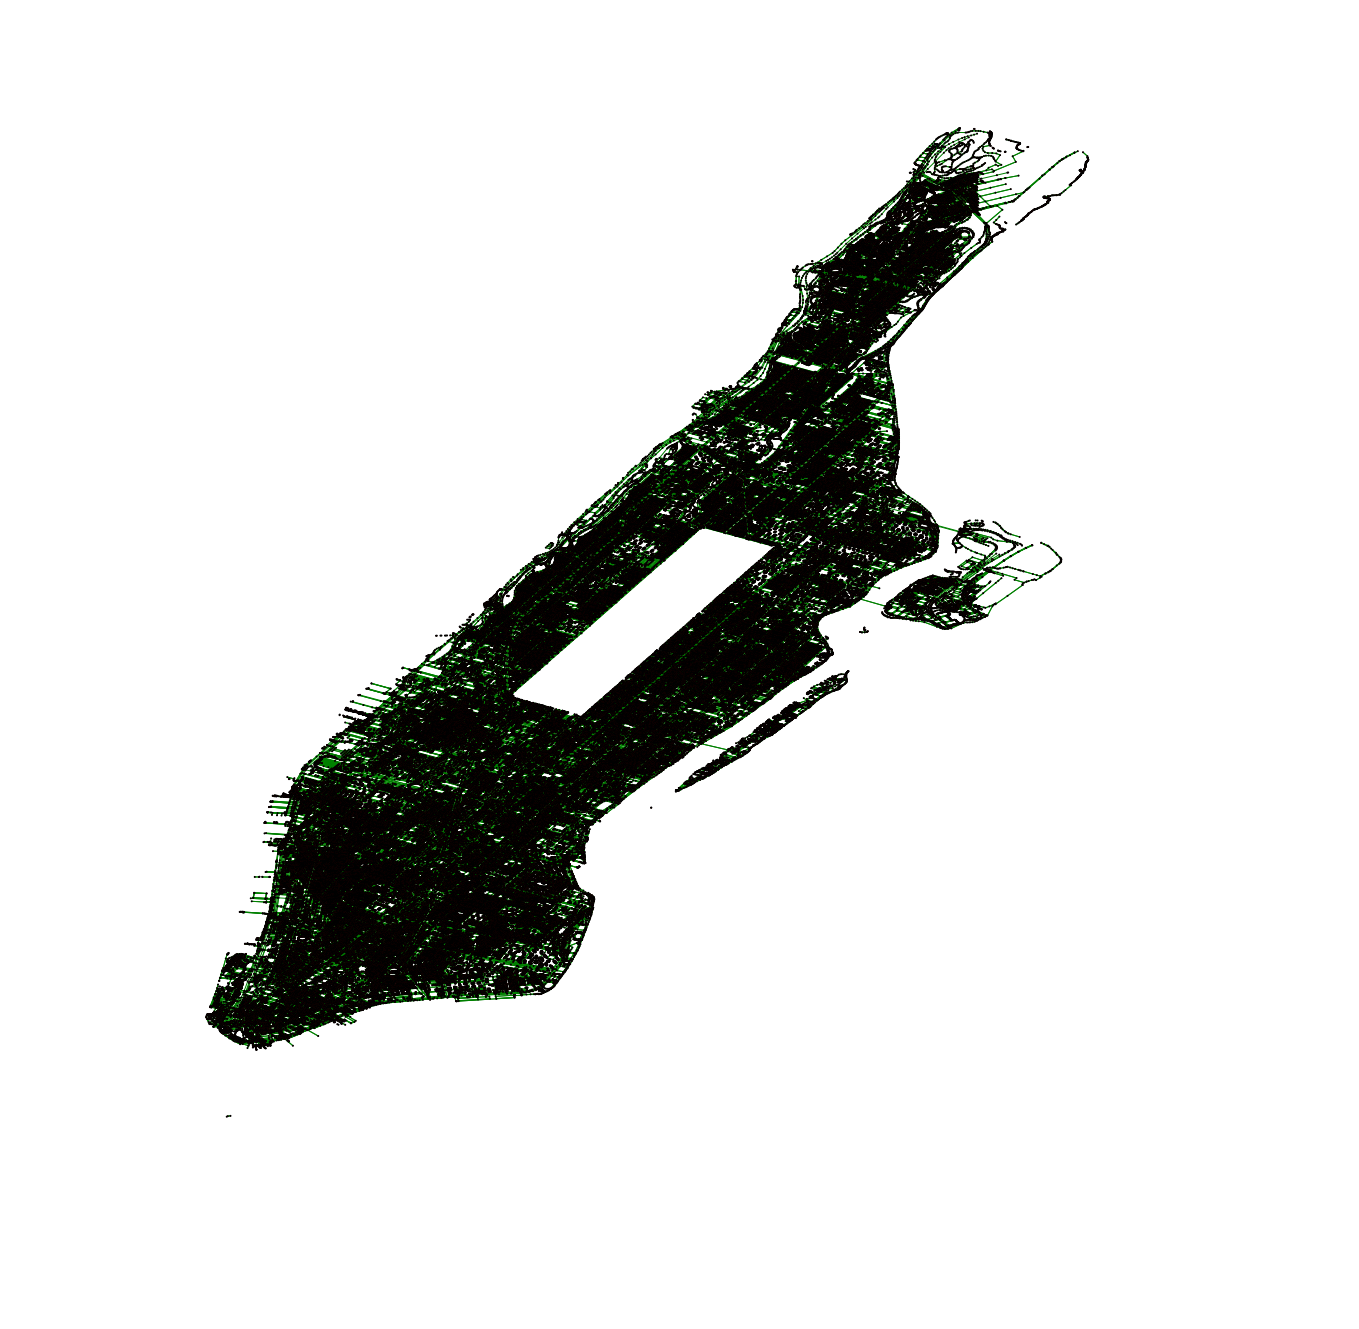

In [54]:
#visualize the street newtork
plt.figure(figsize = (18,18))
nx.draw(NYCStreets,pos=IntPos,with_labels=False,arrows=False,node_size=1,width=1,edge_color='green')

compute degree, pagerank, betweenness and closeness centrality for Manhattan street intersections

In [56]:
mc1= nx.degree(NYCStreets)
topdict(mc1,10)

1|3233235454:16
2|1241742563:13
3|2873268275:12
4|470209122:12
5|42422283:12
6|42422592:12
7|42428411:12
8|42428433:12
9|42432908:12
10|1504153626:12


In [58]:
mc2 = nx.pagerank(NYCStreets,0.85)
topdict(mc2,10)

1|42423514:8.24093456834e-06
2|591997657:7.55588769099e-06
3|1241742563:7.04210253297e-06
4|42444355:6.69957909429e-06
5|42426747:6.52831737495e-06
6|42437693:6.52831737495e-06
7|60925991:6.52831737495e-06
8|427850840:6.52831737495e-06
9|60928040:6.52831737495e-06
10|2706603539:6.52831737495e-06


So the rankings happen to be completely distinctive. Now visualize the top street intersections in terms of all four centrality measures above.

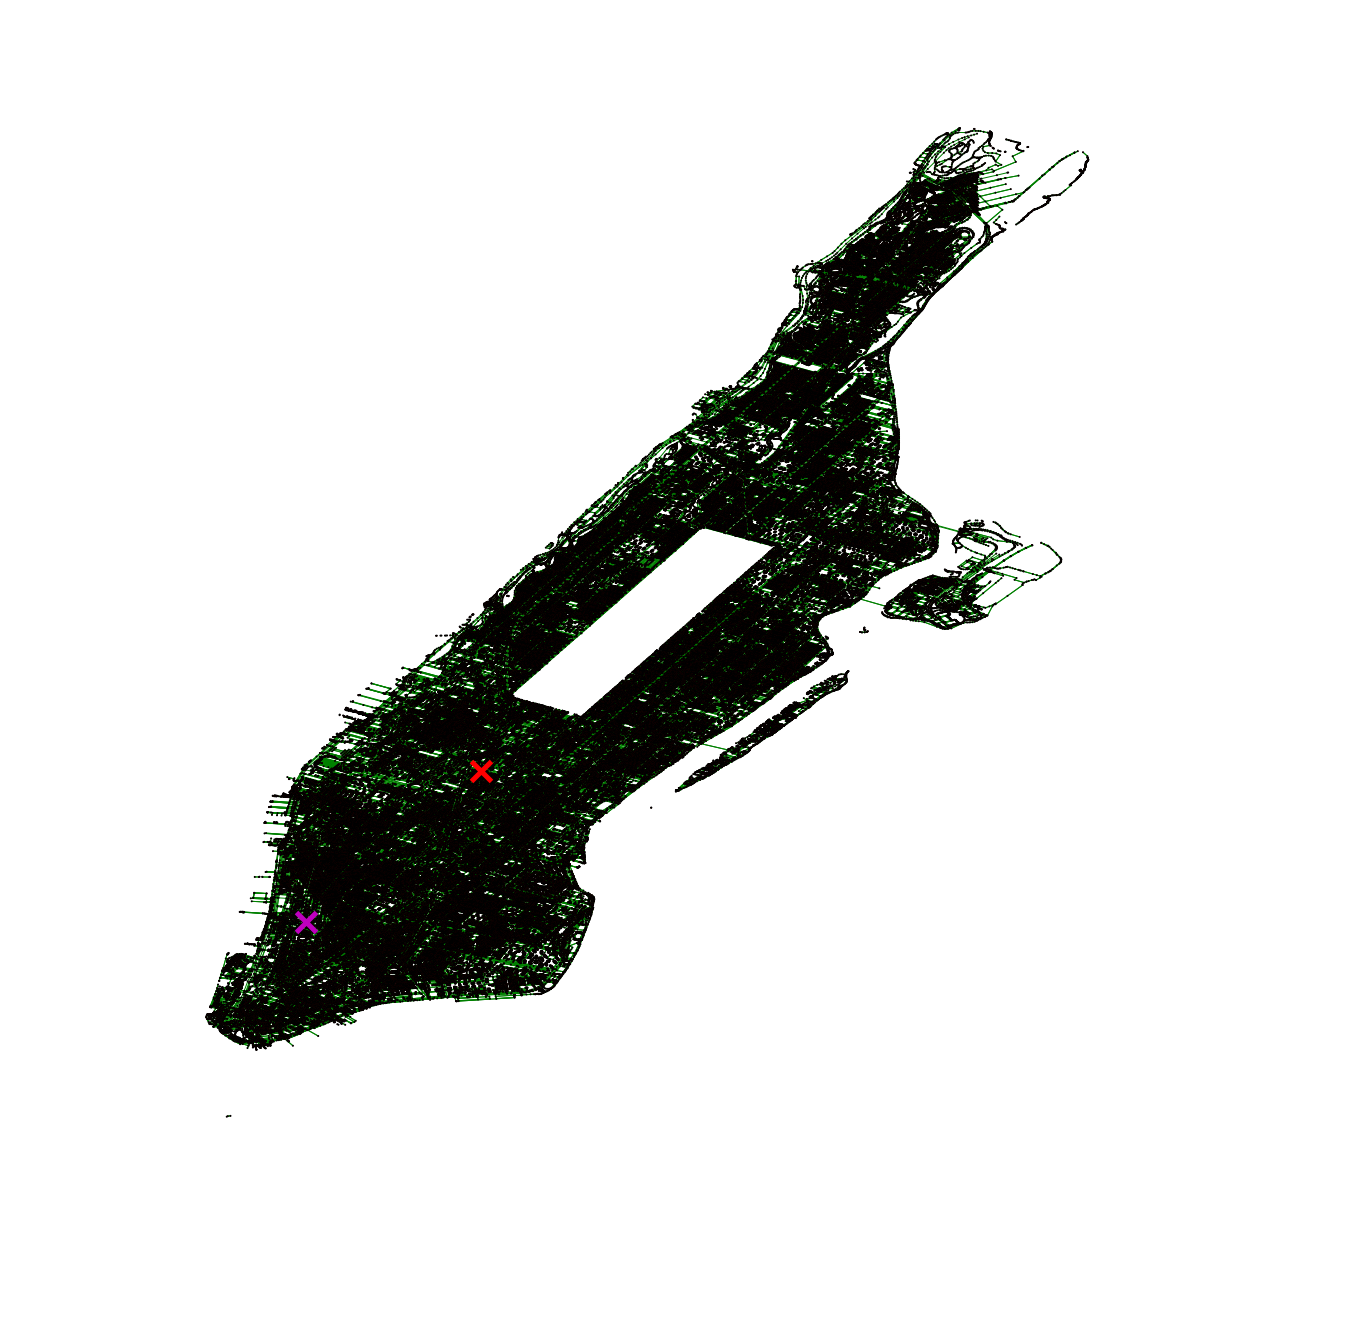

In [69]:
plt.figure(figsize = (18,18))
nx.draw(NYCStreets,pos=IntPos,with_labels=False,arrows=False,node_size=1,width=1,edge_color='green')
plt.plot(IntPos[3233235454][0],IntPos[3233235454][1],'xr',markersize=20,markeredgewidth=5)
plt.plot(IntPos[42423514][0],IntPos[42423514][1],'xm',markersize=20,markeredgewidth=5)

Unfortunately computing closeness and betweenness centrality metrics (which would be actually the most interesting ones for the street network) would be problematic for such a network that big (almost 0.5M nodes). Let's limit ourselves with just the Lower Mahnattan community district 1.

In [70]:
NYCintersections1 = pd.read_csv( 'https://serv.cusp.nyu.edu/files/ADS-2015/NetworkAnalysis/lab2/Manhattan1StreetMap_nodes.csv' , index_col=0, header=-1 )
NYCintersections1.columns=['Y','X','m']
NYCintersections1.head()

Y          X  m
0                                
30807307  40.792136 -73.962155  0
30807308  40.791991 -73.962188  0
30807309  40.791755 -73.962361  0
30807310  40.791482 -73.962549  0
30807311  40.791263 -73.962740  0

In [71]:
#number of street intersections on Lower Manhattan
sum(NYCintersections1.m)

23232

In [73]:
#create a dictionary of Lower Manhattan flags
InManhattan1={}
for c in NYCintersections1.index:
    InManhattan1[c]=NYCintersections1.m[c]

In [74]:
#creare a directed graph representing street network
NYCStreets1=nx.DiGraph()
for i in NYCstreets.index:
    #adding only streets inside Manhattan
    if InManhattan[NYCstreets.A[i]]&InManhattan1[NYCstreets.B[i]]:
       NYCStreets1.add_edge(NYCstreets.A[i],NYCstreets.B[i])  

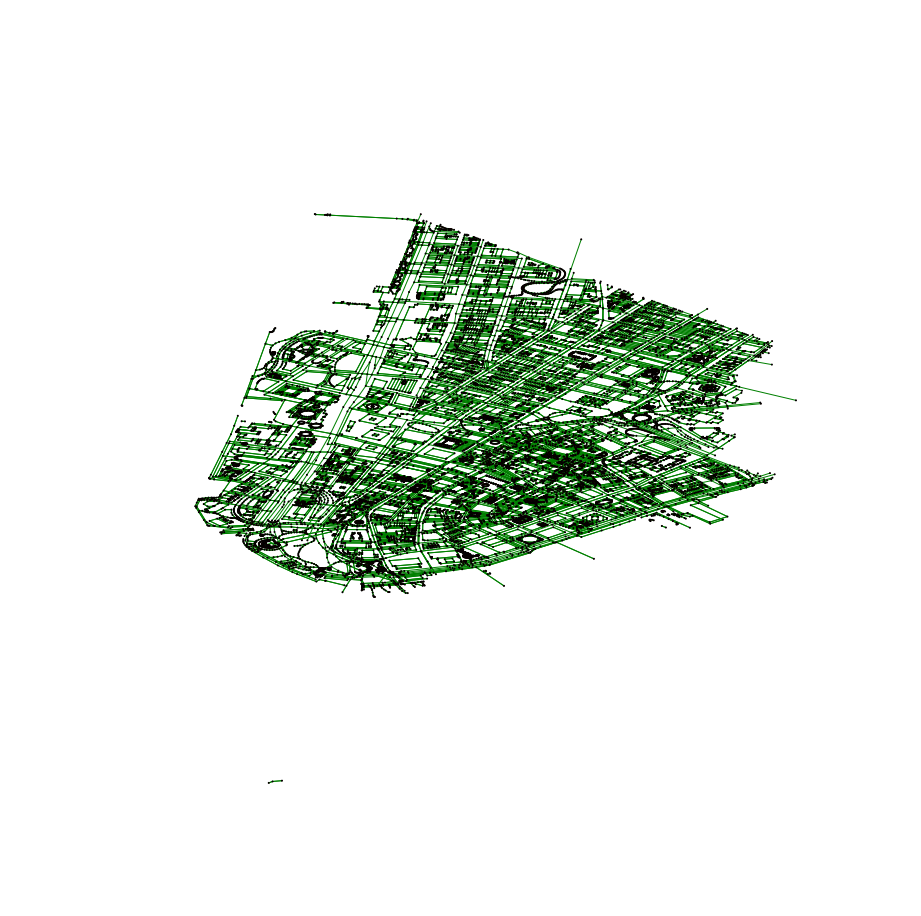

In [75]:
#visualize the street newtork
plt.figure(figsize = (12,12))
nx.draw(NYCStreets1,pos=IntPos,with_labels=False,arrows=False,node_size=1,width=1,edge_color='green')

In [77]:
m1c1= nx.degree(NYCStreets1)
topdict(m1c1,10)

1|42422283:12
2|1692394907:12
3|42444271:11
4|1696138188:10
5|822477100:10
6|2896694758:10
7|3788771159:10
8|3788771201:10
9|2823258925:10
10|1728189729:10


In [78]:
m1c2 = nx.pagerank(NYCStreets1,0.85)
topdict(m1c2,10)

1|42422283:0.000146089713186
2|42434845:0.000138698914924
3|42426747:0.000138460898251
4|42451370:0.000135189436184
5|42427236:0.000134295715757
6|42448469:0.000133684417236
7|42423323:0.000128767355156
8|42424408:0.000125706225927
9|42444355:0.000121470211773
10|42436178:0.000117960513425


In [83]:
m1c3 = nx.betweenness_centrality(NYCStreets1)

In [84]:
topdict(m1c3,10)

1|246858433:0.00902022379513
2|42422042:0.00750090208463
3|42422028:0.00748815437794
4|42428385:0.00734391259451
5|42422032:0.00665136988189
6|42422035:0.00653648059972
7|42422038:0.00648916767906
8|3774727964:0.00629382294455
9|42448583:0.00619026129047
10|246863884:0.00599166502265


In [80]:
nx.number_strongly_connected_components(NYCStreets1)

1216

In [81]:
m1c4 = nx.closeness_centrality(NYCStreets1)

In [82]:
topdict(m1c4,10)

1|42422038:0.00818427774602
2|42422042:0.00816833134158
3|42422035:0.00812551707945
4|42422050:0.00810878660742
5|42422046:0.00809094938033
6|42422032:0.0080905296382
7|42422028:0.00804985440376
8|42428377:0.00804918964159
9|42440290:0.00802706601191
10|42428376:0.00802582671891


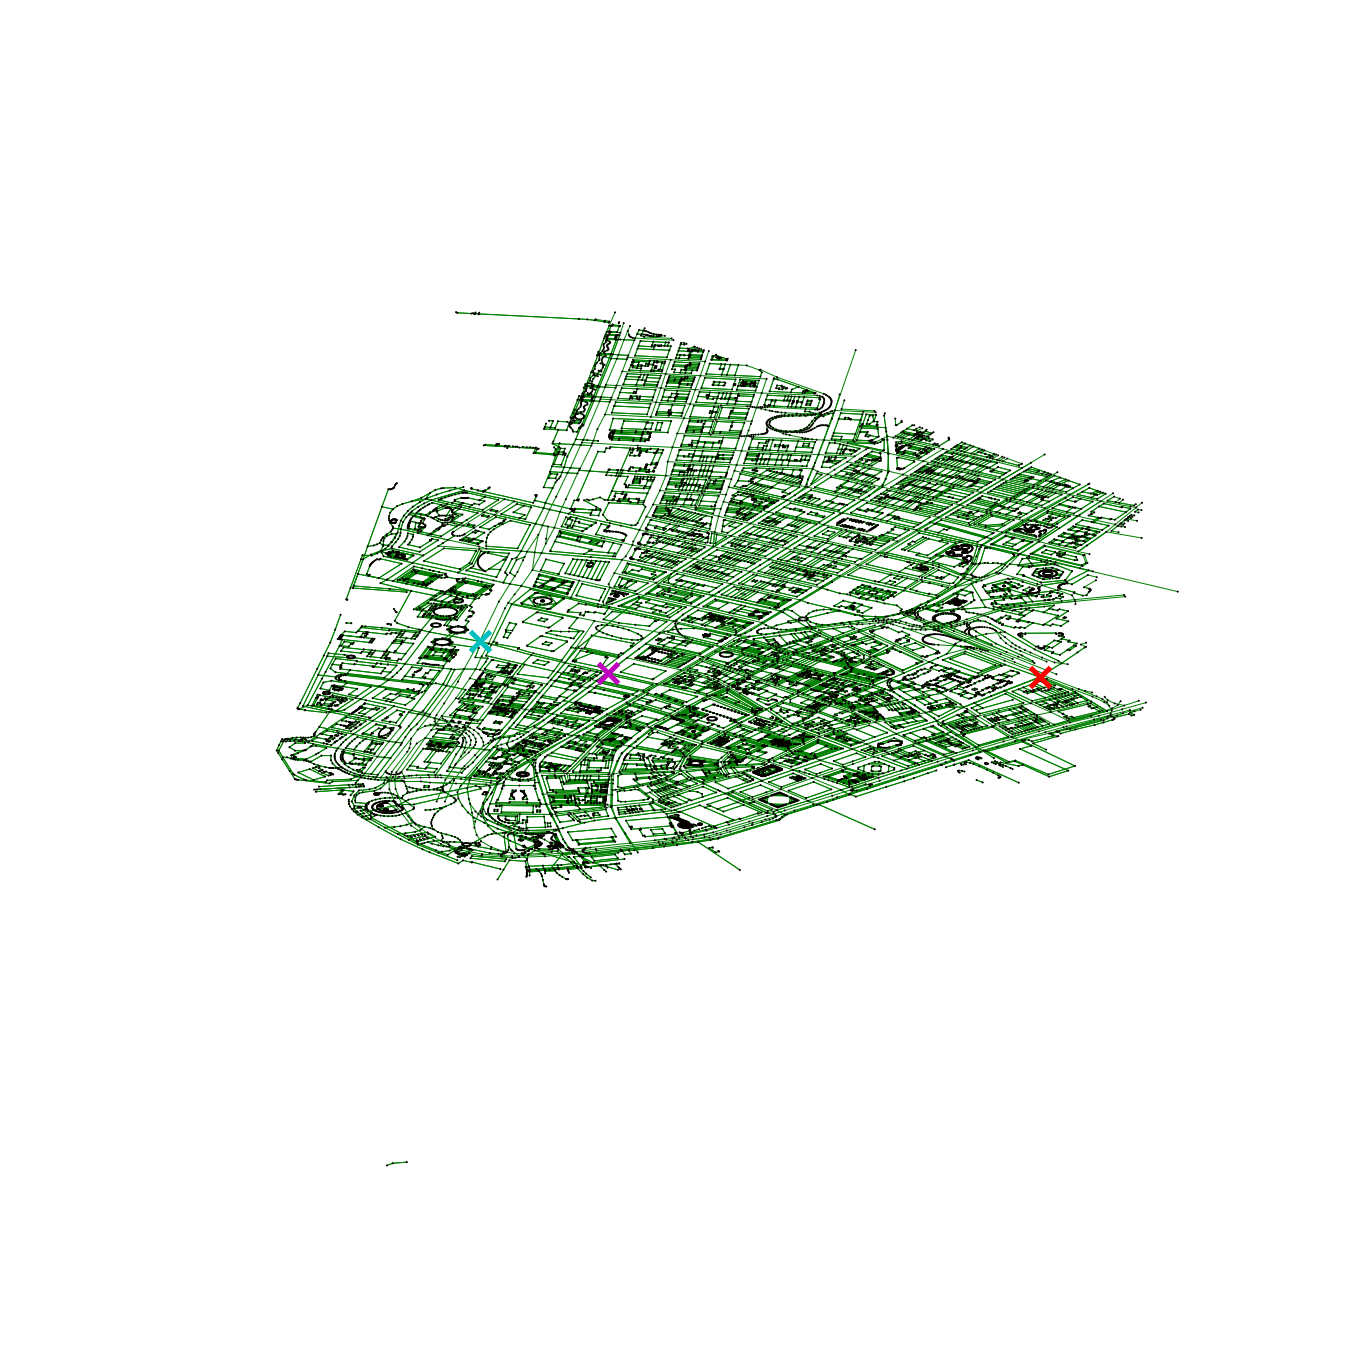

In [85]:
#now visualize top degree/pagerank (red), closeness (magenta) and betweenness (cyan) intersection
plt.figure(figsize = (18,18))
nx.draw(NYCStreets1,pos=IntPos,with_labels=False,arrows=False,node_size=1,width=1,edge_color='green')
plt.plot(IntPos[42422283][0],IntPos[42422283][1],'xr',markersize=20,markeredgewidth=5)
plt.plot(IntPos[42422038][0],IntPos[42422038][1],'xm',markersize=20,markeredgewidth=5)
plt.plot(IntPos[246858433][0],IntPos[246858433][1],'xc',markersize=20,markeredgewidth=5)

So the highest betweenness centrality node is on the West street, serving as a major vertical connection for the entire Manhattan and cetrainly being a part of a number of shortest routes, the highest closeness is one of the most spatially central locations, while highest degree/pagerank (which now coincide) happens to be on one of the major bridge entrances. 

# Degree distribution and scale-free networks

Many real-world networks demonstrate a so called "scale-free" structure, i.e. a power-law node degree distribution
$$
p_k\sim k^{-\gamma}
$$$$
k_r\sim r^{-\frac{1}{\gamma-1}}
$$
where $r$ is the node rank (1-most connected), $k$ - degree, $p_k$ - ratio of nodes with given degree.

In [86]:
#introduce auxiliary function visualizing the degree rank plots
def rankPlot(x,fit=0,params=[]):
  #visualize the rankplot for the array x, fitting it with a power law, lognormal or normal distribution (according to fit) 
  #params - power-law fit cut-off
  xs=sorted(x,reverse=True) # sort the sequence in decreasing order
  plt.loglog(xs,'b-',marker='o') #create a log-log plot of the value vs its rank
  plt.title("Centrality rank plot") #plot title
  #axe labels  
  plt.ylabel("Centrality")
  plt.xlabel("rank")
  fp=[]  
  if fit==1: #power law fit
      xl=np.array(xs)  
      xl=log(xl[xl>0])
      r=log(np.array(range(1,len(xl)+1)))
      data=pd.DataFrame({'x':r,'y':xl})  
      if len(params)==0:
            params=[0, Inf]
      if len(params)==1:
            params=append(params,Inf)
      lm = smf.ols(formula='y ~ x', data = data.loc[(xl>=params[0])&(xl<=params[1])]).fit()
      fp= lm.params.x
      plt.loglog(exp(data.x),exp(lm.predict(data)),'r-',marker='')                   
  if fit==2: #lognormal fit
      xl=log(x[x>0])
      sigma=std(xl)
      mu=mean(xl)  
      fp=sigma
      s=exp(mu)*stat.lognorm.ppf((np.array(range(0,len(xl)+1))+0.5)/(len(xl)+1),sigma)[::-1]
      plt.loglog(s,'r-',marker='.')
  if fit==3: #normal fit
      xl=x[x>0]
      sigma=std(xl)
      mu=mean(xl)  
      fp=sigma
      s=stat.norm.ppf((np.array(range(0,len(xl)+1))+0.5)/(len(xl)+1),loc=mu,scale=sigma)[::-1]
      plt.loglog(s,'r-',marker='.')      
  plt.show()
  return fp  

In [87]:
#introduce a function visualizing degree partial and cumulative distributions
def distribution(x,cdf,params=10):
    xh, xb=np.histogram(log(x),bins=params)
    xh=1.0*xh/len(x)
    xb=(xb[1:]+xb[0:-1])/2
    xb=xb[xh>0]
    xh=xh[xh>0]
    if cdf:
      xh=1-cumsum(xh[:-1])
      xb=xb[:-1]
      plt.ylabel("P(c>=x)")
    else:
      plt.ylabel("p(c=x)")
    plt.loglog(exp(xb),xh,'-b',marker='o')
    plt.xlabel("Centrality, x")

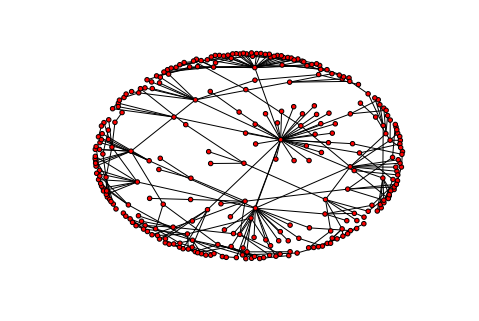

In [88]:
#create and visualize a Barabasi-Albert model network with 300 nodes
BA300=nx.barabasi_albert_graph(300, 1, seed=2015)
random.seed(2012)
nx.draw(BA300,node_size=20)

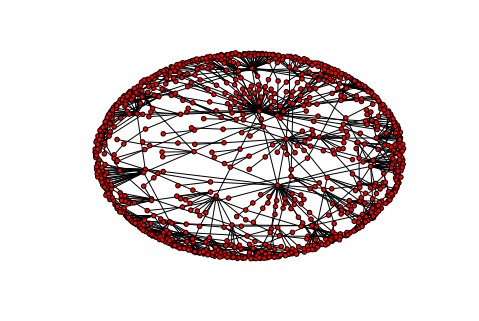

In [89]:
#also a bigger one of 1000 nodes
BA1000=nx.barabasi_albert_graph(1000, 1, seed=2015)
random.seed(2012)
nx.draw(BA1000,node_size=20)

In [90]:
#now create a network of 50.000 nodes
BA50000=nx.barabasi_albert_graph(50000, 1, seed=2014)

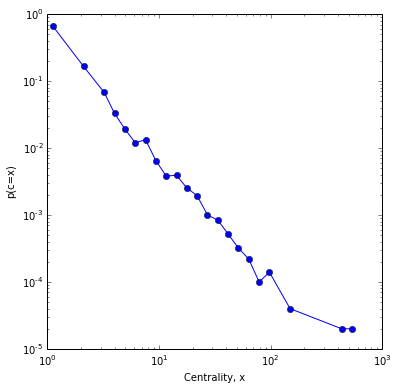

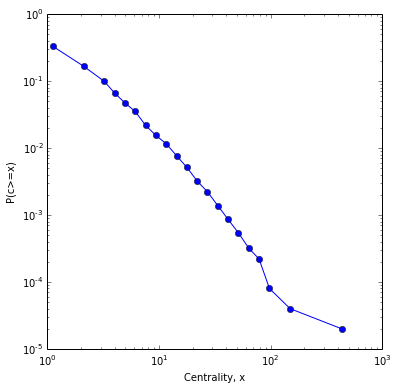

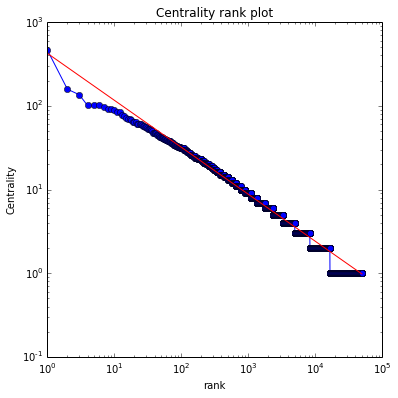

-0.56126578313960718

In [92]:
#and visualize degree distributions for it
d=np.array(nx.degree(BA50000).values())
plt.figure(figsize = (6,6))
distribution(d,cdf=0,params=30)
plt.figure(figsize = (6,6))
distribution(d,cdf=1,params=30)
plt.figure(figsize = (6,6))
rankPlot(d,1,[1])

As expected all three - partial, cumulative degree distributions as well as the rank plot look pretty much like power laws with $\gamma=1+1/0.561=2.783$ which is quite close to the $\lambda=3$ expected for Barabasi-Albert model.

Now let's look at the real-world network of internet infrastructure (subnetwork of 50.000 routers; needs to be downloaded in the local working folder first)

In [94]:
Gwww = nx.read_gml('internet.gml')
Gwww.size()

48436

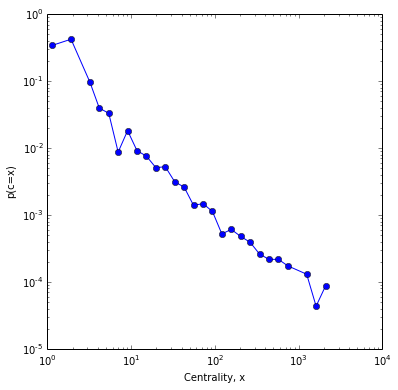

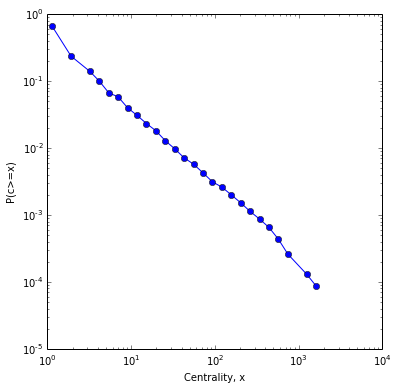

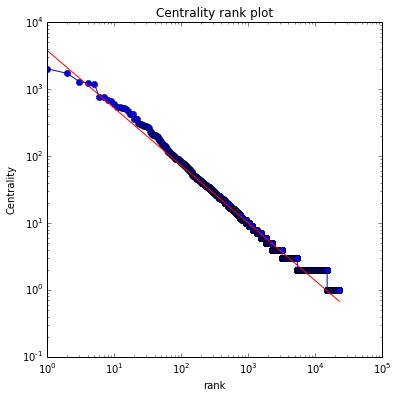

-0.85868917402883327

In [96]:
d=np.array(nx.degree(Gwww).values())
plt.figure(figsize = (6,6))
distribution(d,cdf=0,params=30)
plt.figure(figsize = (6,6))
distribution(d,cdf=1,params=30)
plt.figure(figsize = (6,6))
rankPlot(d,1,[1])

However not all the real-world network demonstrate this clear power law scaling. Ironically this is not the case for the network of co-authorships in network science

In [99]:
netsci = nx.read_gml('netscience.gml')
netsci.size()

2742

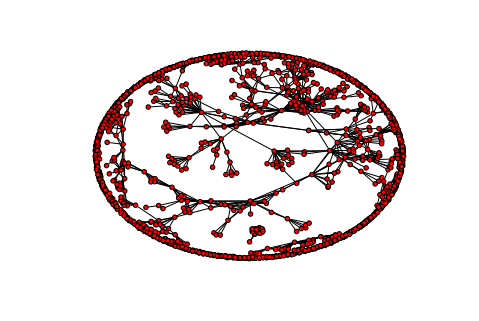

In [100]:
random.seed(2015)
nx.draw(netsci,node_size=20)

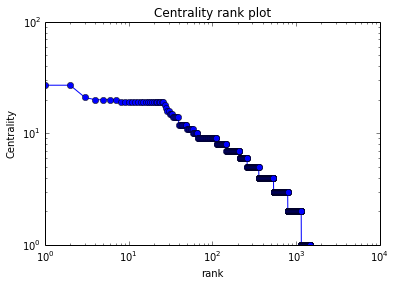

[]

In [101]:
rankPlot(np.array(nx.degree(netsci).values()))

instead a lognormal distribution could explain the observed pattern much better

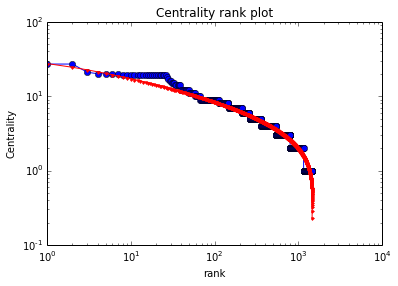

0.73986045791504806

In [102]:
rankPlot(np.array(nx.degree(netsci).values()),2)

The same work to some extent for the street network and a bit worse for the network of air flight connections

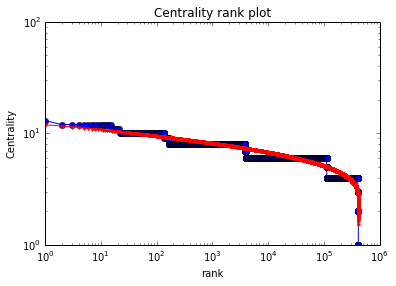

0.22216685407450898

In [107]:
#street network degree centrality
rankPlot(np.array(mc1.values()),2)

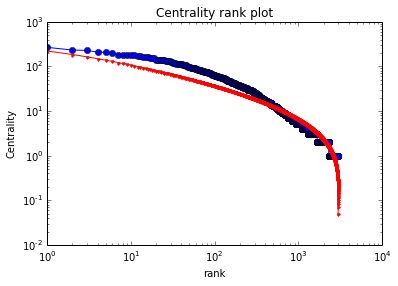

1.2259402427180563

In [103]:
#flight degree centrality
rankPlot(np.array(c1.values()),2)

However a much better fit can be acheived for the closeness centrality

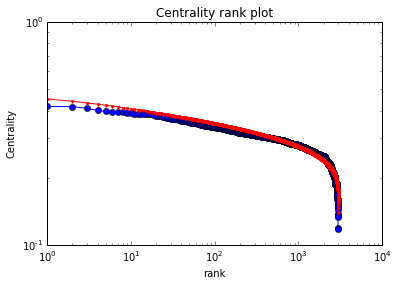

0.17038106346325754

In [113]:
#flight closeness centrality
rankPlot(np.array(c4.values()),2)

# Taxi data

Now let's see how node strength distribution can be used to characterize temporal evolution of a real-world weighted and directed network of taxi ridership between NYC districts

In [114]:
taxioct = pd.read_csv('https://serv.cusp.nyu.edu/files/ADS-2015/NetworkAnalysis/lab2/oct2013aggr2.csv',header=-1)

In [118]:
taxioct.head()

0    1    2   3     4       5   6   7      8       9    10      11  \
0  7319  311  311   0     0    0.00   0   0   0.00  0.0000  0.0  0.0000   
1  7319  312  311   0     0    0.00   0   0   0.00  0.0000  0.0  0.0000   
2  7319  480  311   2  1900  113.14   1   0  19.57  2.3052  8.2  4.5255   
3  7319  501  311   0     0    0.00   0   0   0.00  0.0000  0.0  0.0000   
4  7319  205  311   0     0    0.00   0   0   0.00  0.0000  0.0  0.0000   

      12      13  
0   0.00  0.0000  
1   0.00  0.0000  
2  61.45  9.8288  
3   0.00  0.0000  
4   0.00  0.0000

First column provides a timestamp (hour from beginning of 2013), second and third - district of origin and destination (in a 100*borough+community district format), fourth - number of rides.

In [115]:
minH=min(taxioct[0])
maxH=max(taxioct[0])

In [116]:
len(unique(taxioct[1][taxioct[1]>0]))

71

In [ ]:
Looking at the entire month distributions

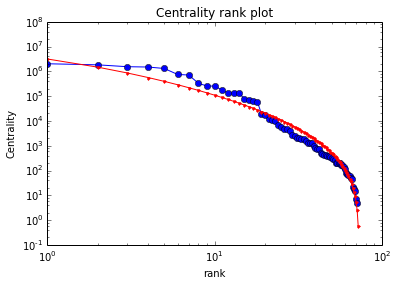

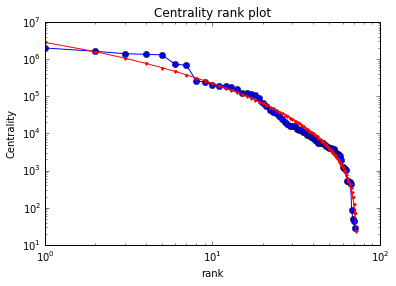

2.5858986170624076

In [117]:
#entire month distributions
ind=taxioct[3]>0
taxihour=taxioct.loc[ind][[1,2,3]]
w1=np.bincount(taxihour[1], weights=taxihour[3])
w2=np.bincount(taxihour[2], weights=taxihour[3])
e=taxihour[3]
e=e[e>0]
rankPlot(w1[w1>0],2)
rankPlot(w2[w2>0],2)
#rankPlot(e[e>0],2)

we see that lognormal distribution explains the node incoming/outgoing strength variation pretty well. We'll use its standard deviation as a key characteristic, describing the slope of the rank plot in this case (instead of the power-law exponent). Let's see how it varies over time

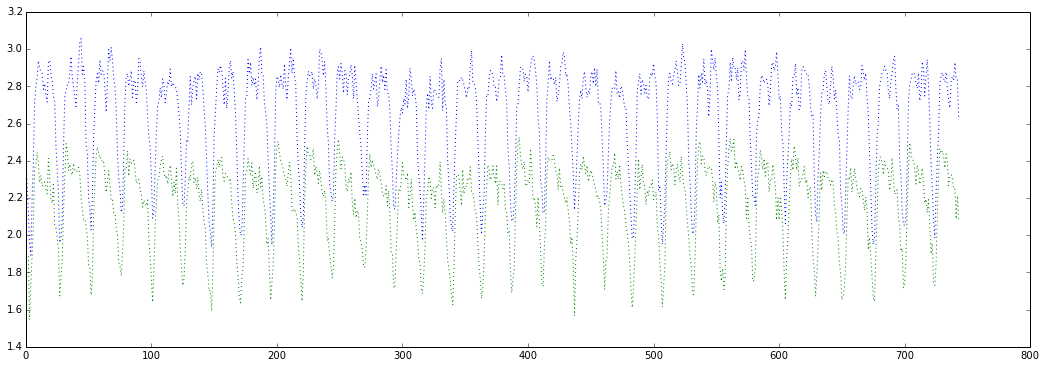

In [119]:
nodes=unique(taxioct[1][taxioct[1]>0])
s1=np.array([0.0]*(maxH-minH+1))
s2=np.array([0.0]*(maxH-minH+1))
se=np.array([0.0]*(maxH-minH+1))
for h in range(minH,maxH+1):
    ind=(taxioct[0]==h)&(taxioct[3]>0)
    taxihour=taxioct.loc[ind][[1,2,3]]
    w1=np.bincount(taxihour[1], weights=taxihour[3])
    w2=np.bincount(taxihour[2], weights=taxihour[3])
    #print(max(w[w>0])/sum(w))
    e=taxihour[3]
    e=e[e>0]
    s1[h-minH]=std(log(w1[w1>0]))
    s2[h-minH]=std(log(w2[w2>0]))
    se[h-minH]=std(log(e))
plt.figure(figsize = (18,6))
plt.plot(s1,':')
plt.plot(s2,':')

The temporal variation of the distribution's standard deviation forms a remarkably regular weekly/daily pattern. This way one can use the specific deviations from the pattern in order to detect anomalies in taxi ridership, which can be caused and therefore used to highlight important events, traffic infrastructure disruptions or enviromental/weather conditions.